# Programming for Data Analysis
by Clare Tubridy
***

## Problem Statement
> For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
>
>- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
>-  Investigate the types of variables involved, their likely distributions, and their relationships with each other.
>-  Synthesise/simulate a data set as closely matching their properties as possible.
>-  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
>
> Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section gives an example project idea.

***

![Baggage](https://cdn.images.express.co.uk/img/dynamic/25/590x/flights-hand-luggage-allowance-plane-carry-on-cabin-baggage-holidays-1125437.jpg?r=1557496446722)

## Airline Baggage Complaints Simulation
### Background
Individuals who frequently fly are well aware that occasional challenges are bound to occur. Flights may experience delays or cancellations due to factors like weather conditions, mechanical issues, or labor strikes. Moreover, baggage-related issues such as loss, delay, damage, or theft are not uncommon. The fact that numerous airlines now charge for luggage makes problems with baggage especially frustrating. Such issues can significantly affect customer loyalty and also pose financial burdens for airlines, as they often incur costs associated with delivering misplaced bags.

**Phenomenon:** <br>
The phenomenon of interest is the relationship between various factors and the number of baggage complaints in the airline industry.

**Variables:**<br>
1. ***Number of Baggage Complaints:*** The total number of complaints related to the baggage issues.
2. ***Number of Scheduled Flights:*** The total number of flights scheduled by the airline.
3. ***Number of Cancelled Flights:*** The total number of flights cancelled by the airline.
4. ***Number of Passengers Enplaned:*** The total number of passengers who boarded the flights.

### Loading Exisiting Dataset

In [1]:
# Imports for the program.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset from CSV file
# https://www.kaggle.com/datasets/gabrielsantello/airline-baggage-complaints-time-series-dataset
df = pd.read_csv("baggagecomplaints.csv")
df.head()

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581


In [3]:
# Convert 'Date' column to pandas datetime format.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%Y")

# Create a new column with the year-month timestamp.
df["Timestamp"] = df["Date"].dt.to_period("M")

# Display the modified DataFrame.
df.head()

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned,Timestamp
0,American Eagle,2004-01-01,1,2004,12502,38276,2481,992360,2004-01
1,American Eagle,2004-02-01,2,2004,8977,35762,886,1060618,2004-02
2,American Eagle,2004-03-01,3,2004,10289,39445,1346,1227469,2004-03
3,American Eagle,2004-04-01,4,2004,8095,38982,755,1234451,2004-04
4,American Eagle,2004-05-01,5,2004,10618,40422,2206,1267581,2004-05


In [4]:
# Summary of the dataframes basic information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Airline    252 non-null    object        
 1   Date       252 non-null    datetime64[ns]
 2   Month      252 non-null    int64         
 3   Year       252 non-null    int64         
 4   Baggage    252 non-null    int64         
 5   Scheduled  252 non-null    int64         
 6   Cancelled  252 non-null    int64         
 7   Enplaned   252 non-null    int64         
 8   Timestamp  252 non-null    period[M]     
dtypes: datetime64[ns](1), int64(6), object(1), period[M](1)
memory usage: 17.8+ KB


### Exploring the Dataset

In [5]:
# Calculate mean, median, and standard diviation.
relevant_columns = ["Baggage", "Scheduled", "Cancelled", "Enplaned"]

mean = df[relevant_columns].mean()
median = df[relevant_columns].median()
std_devs = df[relevant_columns].std()

In [6]:
# Create a summary dataframe.
descriptive_stats = pd.DataFrame({
    "Mean": mean,
    "Median":median,
    "Standard Deviation": std_devs
})

# Display the descriptive statistics.
print(descriptive_stats)

                   Mean     Median  Standard Deviation
Baggage    1.261351e+04    12224.0        9.993307e+03
Scheduled  2.812801e+04    36696.0        1.709209e+04
Cancelled  7.037619e+02      533.0        7.460204e+02
Enplaned   2.203871e+06  1391112.5        1.788200e+06


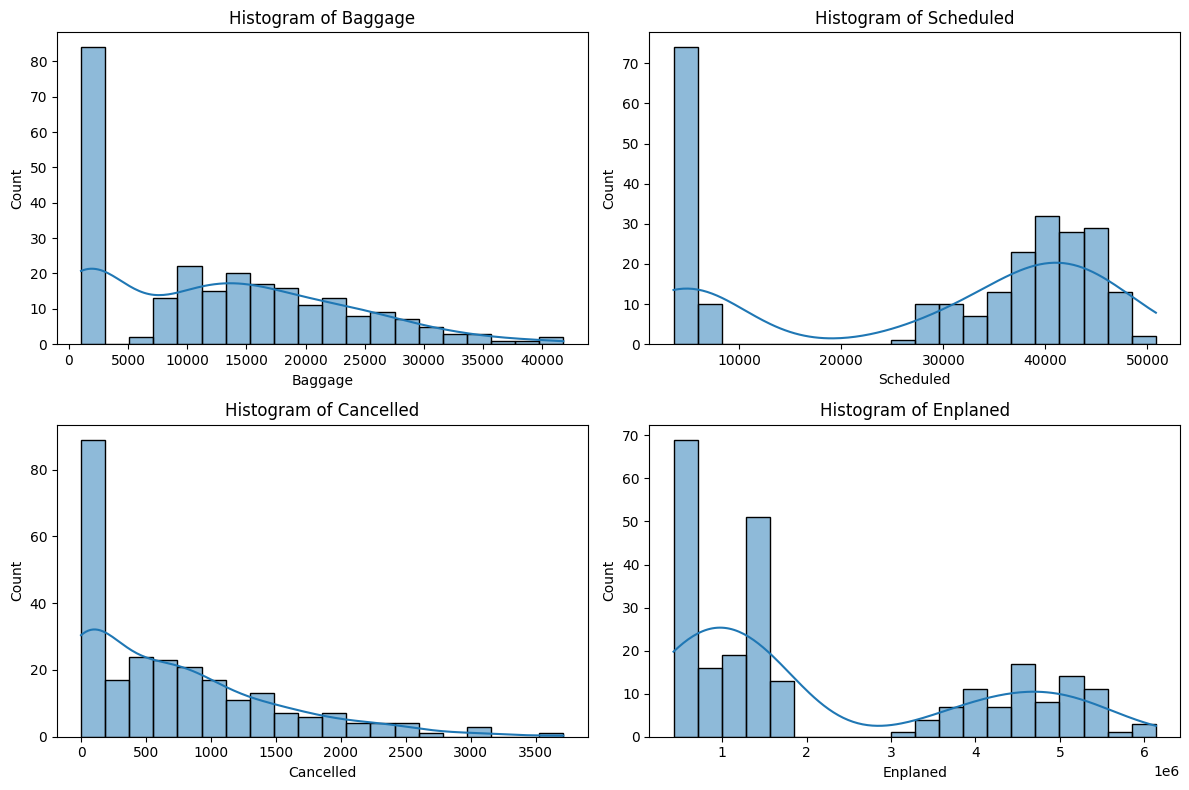

In [7]:
# Histograms for each variable.
# https://www.geeksforgeeks.org/enumerate-in-python/
plt.figure(figsize=(12,8))
for i, col in enumerate(relevant_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins = 20, kde = True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

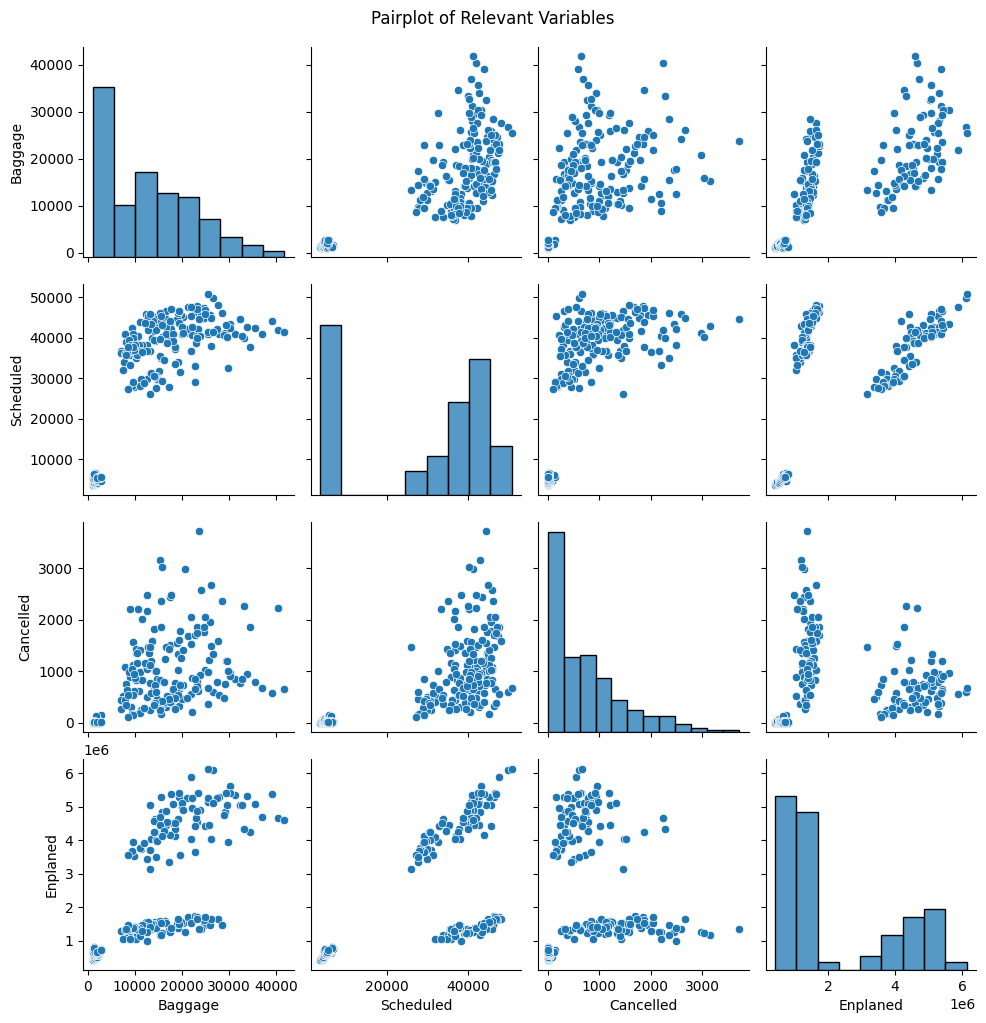

In [8]:
# Pairplot for relationships.
# https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
plt.figure(figsize=(10, 6))
sns.pairplot(df[relevant_columns])
plt.suptitle("Pairplot of Relevant Variables", y = 1.02)
plt.show()

### Exploring American Eagle Data
I am narrowing down the analysis to a specific airline's data because the previous graphs lack a clear distribution. The varied sizes of airlines could potentially skew the results, especially in terms of overall baggage complaints volume. Focusing on a single airline will provide a more accurate representation and facilitate a clearer understanding of the data patterns.

In [9]:
# Filter the dataframe to include only the selected airline.
df_american_eagle = df[df['Airline'] == 'American Eagle']

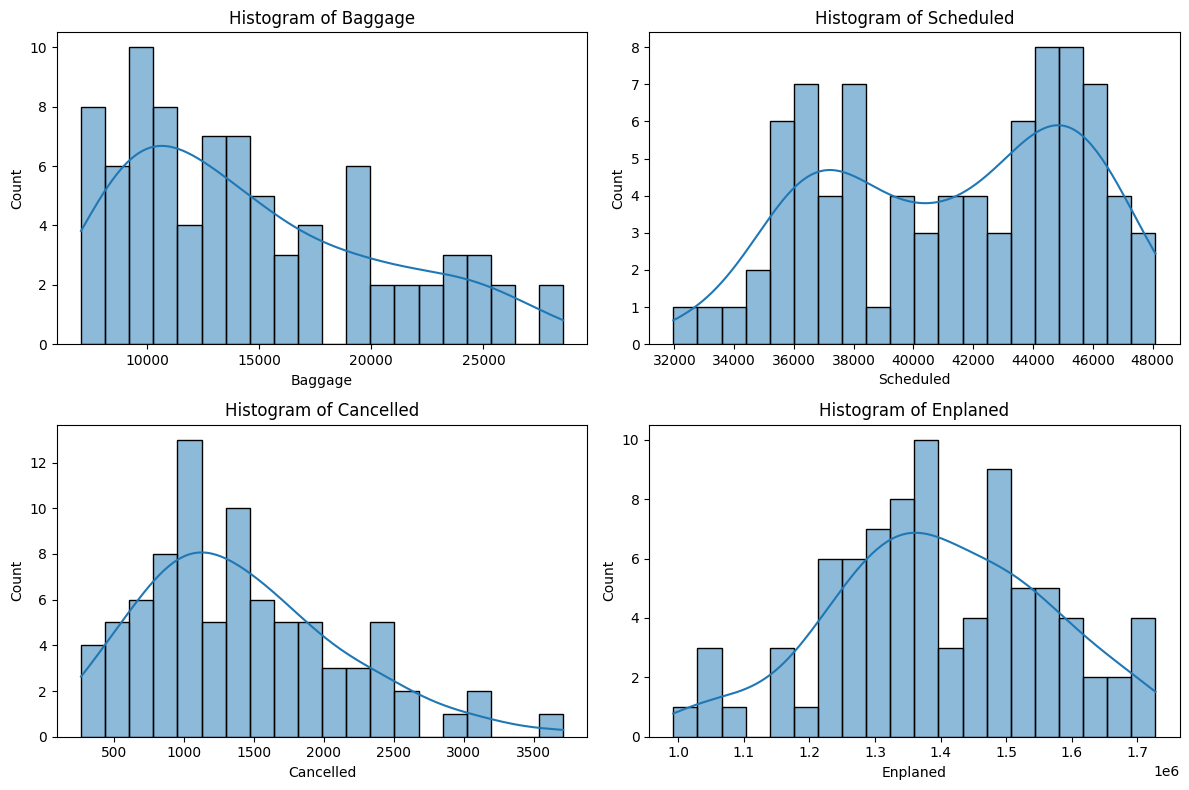

In [10]:
# Create subplots for each numerical variable.
plt.figure(figsize=(12,8))
for i, col in enumerate(relevant_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_american_eagle[col], bins = 20, kde = True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

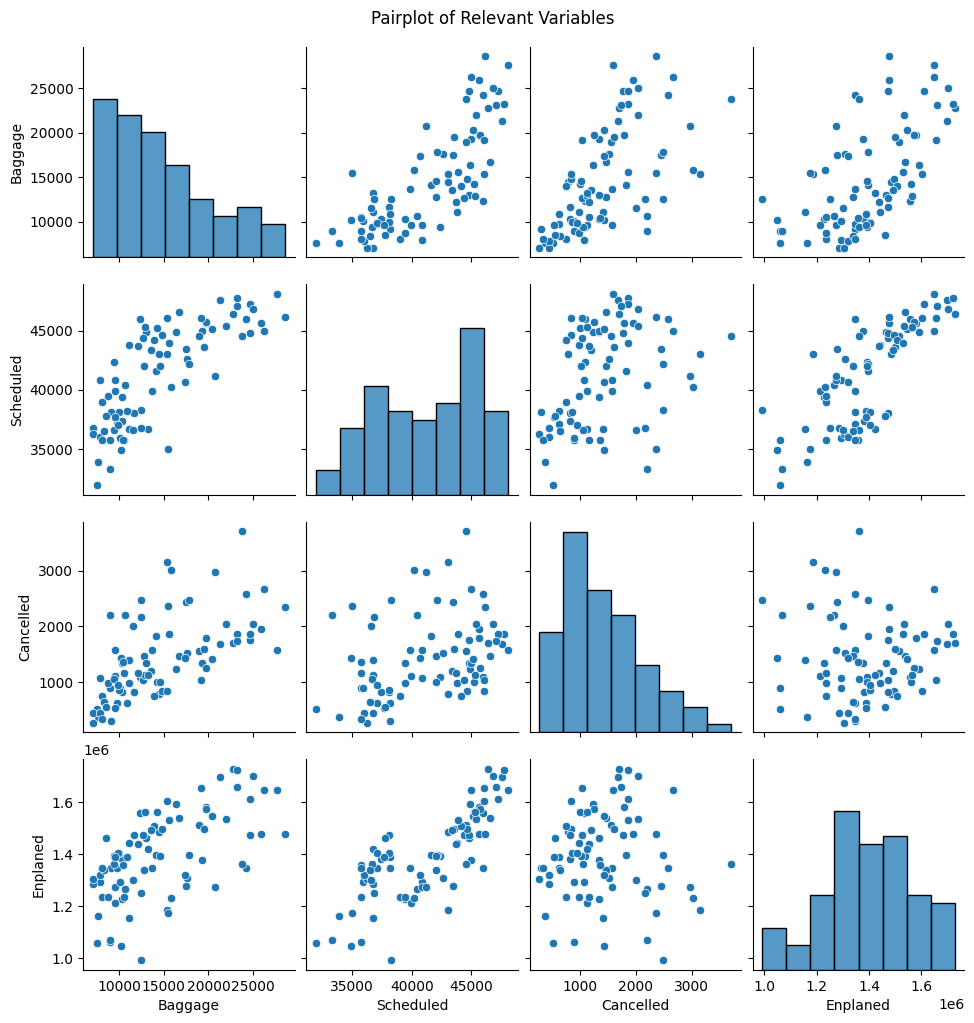

In [11]:
# Pairplot for relationships.
# https://stackoverflow.com/questions/55767312/how-to-position-suptitle
plt.figure(figsize=(10, 6))
sns.pairplot(df_american_eagle[relevant_columns])
plt.suptitle("Pairplot of Relevant Variables", y = 1.02)
plt.show()

### Distribution Assumptions
The choice of distributions for modeling variables such as *Baggage*, *Scheduled*, *Cancelled*, and *Enplanded* in this analysis are based on certain assumptions and characteristics that have been moddelled from the observed real-world scenarios above. 

1. **Number of Baggage Complaints:**
    - The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is often used to model the number of events that occur within a fixed interval of time or space when these events happen with a known constant mean rate and are independent of the time since the last event.
    - Baggage complaints could be seen as rare events that occur randomly, and the Poisson distribution is suitable for modeling rare events.

2. **Number of Scheduled Flights:**
    - The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) often justifies the use of the normal distribution for modeling the sum or average of a large number of independent, identically distributed random variables.
    - The number of scheduled flights is likely to be influenced by multiple factors, and the normal distribution is a common choice when there are many independent factors contributing to a total count.

3. **Number of Cancelled Flights:**
    - Similar to the reasoning for baggage complaints, flight cancellations can be considered rare events occurring randomly. The Poisson distribution is appropriate for such scenarios.

4. **Number of Passengers Enplaned:**
    - The normal distribution is frequently used when dealing with continuous variables. Passenger enplanement, being influenced by various factors, may exhibit a normal distribution.

    - The choice of a normal distribution is also practical for representing the variability around the mean, assuming that the factors influencing passenger numbers have a symmetrical impact.
    
It's important to note that these choices are based on assumptions about the underlying processes generating the data, and real-world data might deviate from these assumptions. We can see this deviation in the data of Scheduled Flights. A few factors that may have caused this deviation include, seasonal variation, external events such as natural diasters, and industry-specific factors such as fuel price.


### Relationships
- **Weak Positive relationship between Number of Baggage Complaints and Number of Passengers Enplaned:** More passengers may lead to a higher number of baggage complaints. 
- **Weak Positive relationship between Number of Baggage Complaints and Number of Cancelled Flights:** Higher cancellations might be associated with a higher number of baggage complaints. 
- **Strong Positive relationship between Number of Baggage Complaints and Number of Scheduled Flights:** More scheduled flights may lead to a higher number of baggage complaints as there is a higher volume of passengers.

In [12]:
# Correlation of Number of Baggage Complaints and Number of Passengers Enplaned.
r = np.corrcoef(df_american_eagle["Baggage"], df_american_eagle["Enplaned"])
r

array([[1.        , 0.61008315],
       [0.61008315, 1.        ]])

In [13]:
# Correlation of Number of Baggage Complaints and Number of Cancelled Flights.
r = np.corrcoef(df_american_eagle["Baggage"], df_american_eagle["Cancelled"])
r

array([[1.        , 0.62144747],
       [0.62144747, 1.        ]])

In [14]:
# Correlation of Number of Baggage Complaints and Number of Scheduled Flights.
r = np.corrcoef(df_american_eagle["Baggage"], df_american_eagle["Scheduled"])
r

array([[1.        , 0.77851489],
       [0.77851489, 1.        ]])

### Simulating A DataFrame

In [26]:
# Number of data points.
num_samples = 100

In [27]:
# Simulate data for each variable with modified parameters.
# Means and standard deviations got from existing dataset.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
baggage_complaints = np.abs(np.random.poisson(lam=12613, size=num_samples)).astype(int)
scheduled_flights = np.abs(np.random.normal(loc=28128, scale=17092, size=num_samples)).astype(int)
cancelled_flights = np.abs(np.random.poisson(lam=703, size=num_samples)).astype(int)
passengers_enplaned = np.abs(np.random.normal(loc=2203871, scale=1788200, size=num_samples)).astype(int)

In [28]:
# Create a DataFrame to store the data.
airline_data = pd.DataFrame({
    "Baggage": baggage_complaints,
    "Scheduled": scheduled_flights,
    "Cancelled": cancelled_flights,
    "Enplaned": passengers_enplaned
})

# Display the simulated data.
airline_data

,Baggage,Scheduled,Cancelled,Enplaned
0,12668,15120,752,140719
1,12377,13952,681,3322289
2,12615,38578,696,2213715
3,12674,18242,666,2036914
4,12437,6618,699,1219620
...,...,...,...,...
95,12509,12678,651,858496
96,12827,46019,706,1635455
97,12557,11105,672,5410942
98,12403,28548,721,1900366


### Exploring Simulated DataFrame

In [29]:
# Calculate mean, median, and standard diviation.
mean = airline_data.mean()
median = airline_data.median()
std_devs = airline_data.std()

# Create a summary dataframe.
simulated_descriptive_stats = pd.DataFrame({
    "Mean": mean,
    "Median":median,
    "Standard Deviation": std_devs
})

# Display the simulated descriptive statistics.
print(simulated_descriptive_stats)

                 Mean     Median  Standard Deviation
Baggage      12599.93    12612.0        1.104642e+02
Scheduled    29246.56    29108.5        1.417267e+04
Cancelled      698.37      699.5        2.498875e+01
Enplaned   2199126.42  2029556.0        1.357970e+06


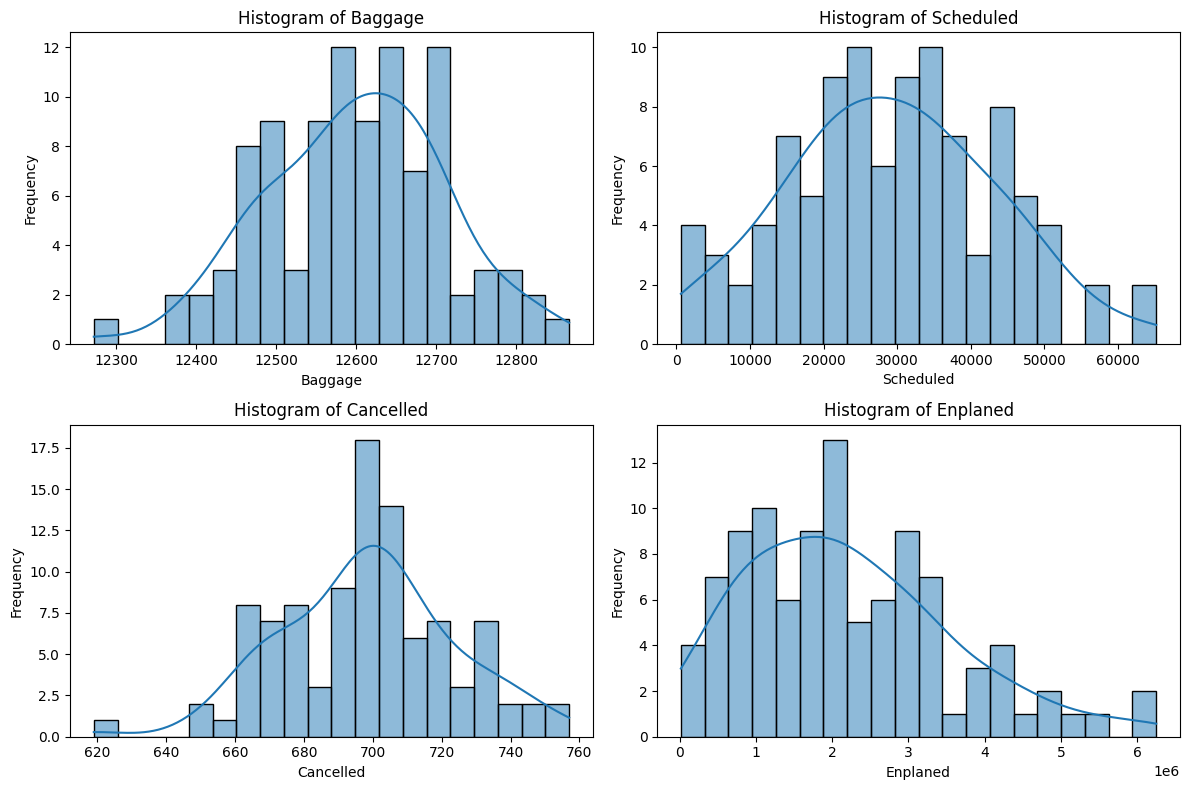

In [30]:
# Plot histograms for each variable in the simulated data.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the 2D array of subplots for easier indexing.
# https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do
axes = axes.flatten()

# Iterate over each column and plot the histogram.
for i, col in enumerate(airline_data.columns):
    sns.histplot(airline_data[col], bins=20, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

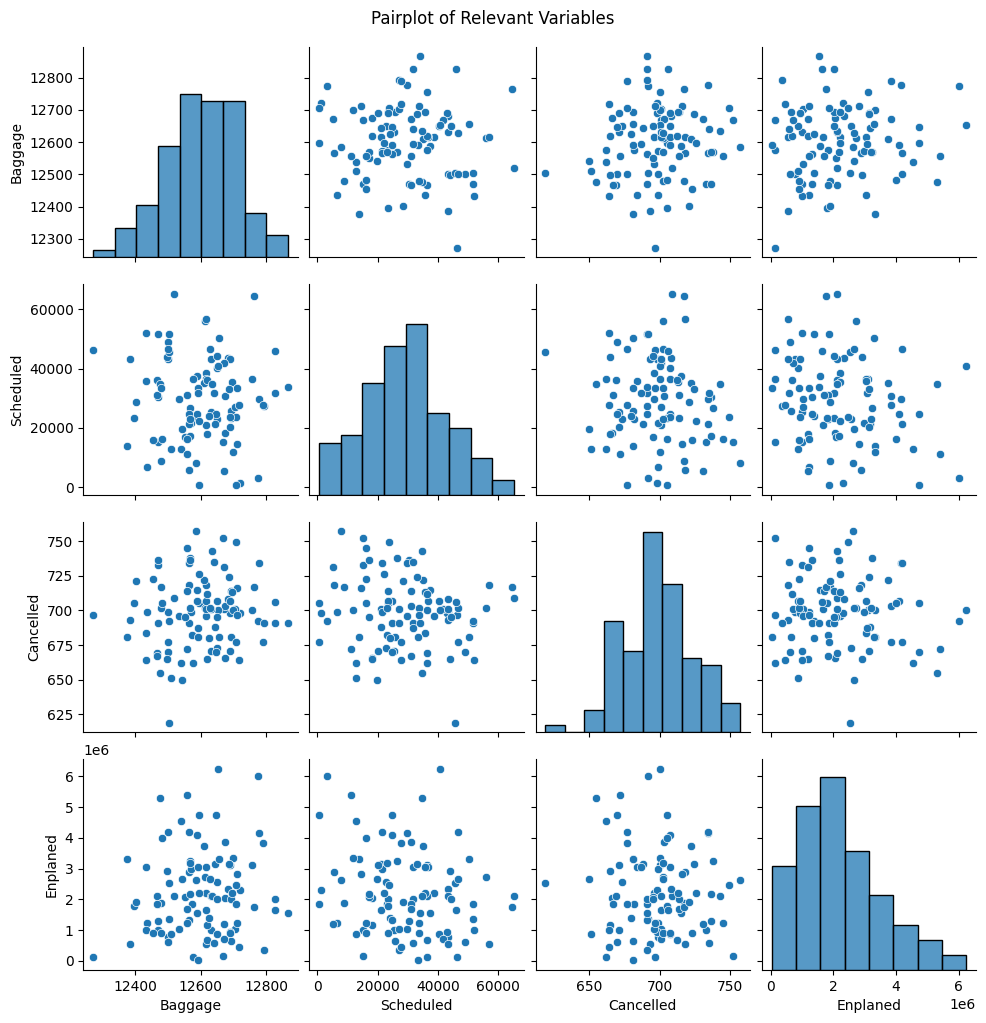

In [31]:
# Pairplot for relationships.
plt.figure(figsize=(10, 6))
sns.pairplot(airline_data)
plt.suptitle("Pairplot of Relevant Variables", y = 1.02)
plt.show()

In [32]:
# Correlation of Number of Baggage Complaints and Number of Passengers Enplaned.
r = np.corrcoef(airline_data["Baggage"], airline_data["Enplaned"])
r

array([[1.        , 0.10041893],
       [0.10041893, 1.        ]])

In [33]:
# Correlation of Number of Baggage Complaints and Number of Passengers Cancelled.
r = np.corrcoef(airline_data["Baggage"], airline_data["Cancelled"])
r

array([[1.        , 0.12213146],
       [0.12213146, 1.        ]])

In [34]:
# Correlation of Number of Baggage Complaints and Number of Passengers Scheduled.
r = np.corrcoef(airline_data["Baggage"], airline_data["Scheduled"])
r

array([[ 1.        , -0.05709954],
       [-0.05709954,  1.        ]])

### Comparison of DataFrames
To assess how close the simulated and real data are, the percentage difference between the simulated and real values for each metric must be calculated. The formula for [percentage difference](https://www.inchcalculator.com/percent-difference-calculator/) is given by:

$$Percentage Difference =\frac{|Simulated Value - Real Value|}{\frac {Simulated Value + Real Value}{2}} * 100 $$

In [35]:
# Data Comparison between Simulated and Real Data.
# Real Data.
print("Real Data: \n")
print(descriptive_stats)
print("---"*21)

# Simulated data.
print("Simulated Data: \n")
print(simulated_descriptive_stats)

Real Data: 

                   Mean     Median  Standard Deviation
Baggage    1.261351e+04    12224.0        9.993307e+03
Scheduled  2.812801e+04    36696.0        1.709209e+04
Cancelled  7.037619e+02      533.0        7.460204e+02
Enplaned   2.203871e+06  1391112.5        1.788200e+06
---------------------------------------------------------------
Simulated Data: 

                 Mean     Median  Standard Deviation
Baggage      12599.93    12612.0        1.104642e+02
Scheduled    29246.56    29108.5        1.417267e+04
Cancelled      698.37      699.5        2.498875e+01
Enplaned   2199126.42  2029556.0        1.357970e+06


In [36]:
# Calculate percentage difference for each metric.
absolute_difference = abs(simulated_descriptive_stats - descriptive_stats)
average = (simulated_descriptive_stats + descriptive_stats) / 2
percentage_differences = (absolute_difference / average) * 100

# Display the percentage difference.
print(percentage_differences)

               Mean     Median  Standard Deviation
Baggage    0.107704   3.124497          195.626812
Scheduled  3.899122  23.060733           18.675434
Cancelled  0.769101  27.018256          187.035823
Enplaned   0.215500  37.328581           27.349469


1. **Baggage:** The mean and median differences are relatively small, but the standard deviation difference is quite large. This suggests that the simulated data captures the central tendency well but deviates significantly in terms of variability.
2. **Scheduled:** The mean and median differences are moderate, suggesting some discrepancy in central tendency. The standard deviation difference is very small, indicating a good match in terms of variability.
3. **Cancelled:** Similar to baggage, the mean and median differences are relatively small, but the standard deviation difference is substantial. Again, this indicates a deviation in variability.
4. **Enplaned:** The mean, median,and standard deviation differences are moderate suggesting some discrepancy in central tendency and a slight deviation in variability.

The results suggest that the simulated data generally captures the central tendencies (mean and median) but may deviate significantly in terms of variability, especially for baggage and cancelled flights. This indicates that the simulation successfully captures a majority of the statistical characteristics of the actual airline data.

***
## End